# Perceptron multicouches et Keras

Définition d'un perceptron multicouches à deux couches cachées pour la classification de données MNIST


## MNIST 

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)




# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk
from tensorflow.keras import Sequential


from tensorflow.keras.layers import Input, Dense, Activation,Lambda
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam


# Données

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [2]:
(x_train, y_train), (x_test, y_test) =tk.datasets.mnist.load_data()

num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape((num_examples, num_input))/255
x_test  = x_test.reshape((num_test, num_input))/255

# normalisation



print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Taille de la rétine :  784
Nombre d'exemples :  60000


# Réseau

## Paramètres du réseau

Dans un premier temps, on définit les paramètres du réseau : 
- 256 neurones cachés dans chaque couche cachée, 
- un apprentissage par batchs de taille 100
- 15 itérations pour l'apprentissage


In [3]:

lr = 0.001
num_epochs = 15
batch_size = 100

# Nombre de neurones sur les deux couches cachées
num_hidden_1 = 256 
num_hidden_2 = 256 

## Définition du réseau

On construit alors le modèle :
- le réseau
- la fonction de coût à optimiser : dans le cas d'un problème de classification, la fonction d'entropie croisée calculée entre la sortie théorique et la sortie calculée par le modèle est adéquate
- la méthode d'optimisation utilisée (descente de gradient) : ici, l'algorithme [ADAM](https://arxiv.org/abs/1412.6980) est utilisé

In [4]:
#TODO : réseau
model = Sequential([
    Dense(64, input_shape=(784,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/Users/neil/miniconda3/envs/AI_ML/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-30 16:57:24.226137: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-09-30 16:57:24.226189: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-30 16:57:24.226223: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-30 16:57:24.226247: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-30 16:57:24.226269: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:2

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#TODO : optimiseur et fonction de perte
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

On entraîne le modèle

In [9]:
#TODO ;: entraînement
hist = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9762 - val_loss: 0.0819
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9931 - loss: 0.0233 - val_accuracy: 0.9735 - val_loss: 0.0937
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9760 - val_loss: 0.0875
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9940 - loss: 0.0194 - val_accuracy: 0.9759 - val_loss: 0.0949
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9953 - loss: 0.0159 - val_accuracy: 0.9750 - val_loss: 0.0918
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9955 - loss: 0.0147 - val_accuracy: 0.9763 - val_loss: 0.0885
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.9757 - val_loss: 0.0972
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9961 - loss: 0.0121 - val_accu

In [10]:
print("Précision ={0:5.3f} ".format(hist.history.get('accuracy')[-1]))

Précision =0.996 


Puis on l'évalue sur l'ensemble de test 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9713 - loss: 0.1286


ValueError: x and y must have same first dimension, but have shapes (15,) and (10,)

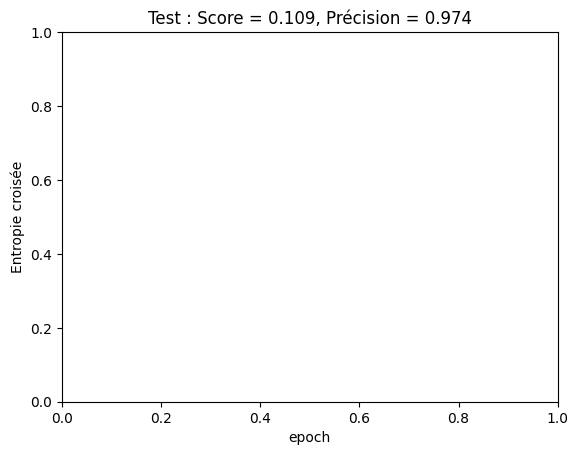

In [11]:
score = model.evaluate(x_test,y_test)

x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.subplots(1,1)
plt.xlabel('epoch')
plt.ylabel('Entropie croisée')
plt.title("Test : Score = {0:5.3f}, Précision = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prédit/vrai : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Nombre d'erreurs {}/{}\n\n".format(incorrects.size,y.size))
